# 世界人口回归

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn
import torch.optim

读取数据

In [2]:
try:
    url = r'http://en.wikipedia.org/wiki/World_population_estimates'
    df = pd.read_html(url, header=0, attrs={"class" : "wikitable"})[2]
except:
    url = 'http://raw.githubusercontent.com/zhiqingxiao/pytorch-book/master/chapter05_linear/population.csv'
    df = pd.read_csv(url, index_col=0)
df

,Year,United States Census Bureau (2017)[28],Population Reference Bureau (1973–2016)[15],United Nations Department of Economic and Social Affairs (2015)[16],Maddison (2008)[17],HYDE (2007)[24],Tanton (1994)[18],Biraben (1980)[19],McEvedy & Jones (1978)[20],Thomlinson (1975)[21],Durand (1974)[22],Clark (1967)[23]
0,1950,2557628654,2.516000e+09,2.525149e+09,2.544000e+09,2.527960e+09,2.400000e+09,2.527000e+09,2.500000e+09,2.400000e+09,NaN,2.486000e+09
1,1951,2594939877,NaN,2.572851e+09,2.571663e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1952,2636772306,NaN,2.619292e+09,2.617949e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1953,2682053389,NaN,2.665865e+09,2.665959e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1954,2730228104,NaN,2.713172e+09,2.716927e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1955,2782098943,NaN,2.761651e+09,2.769074e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1956,2835299673,NaN,2.811572e+09,2.822502e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1957,2891349717,NaN,2.863043e+09,2.879934e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1958,2948137248,NaN,2.916030e+09,2.939254e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1959,3000716593,NaN,2.970396e+09,2.995909e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
years = torch.tensor(df.iloc[:, 0], dtype=torch.float32)
populations = torch.tensor(df.iloc[:, 1], dtype=torch.float32)

线性回归

In [4]:
x = torch.stack([years, torch.ones_like(years)], 1)
y = populations
wr, _ = torch.lstsq(y, x)
slope, intercept = wr[:2, 0]
result = 'population = {:.2e} * year + {:.2e}'.format(slope, intercept)
print('回归结果：' + result)

回归结果：population = 7.53e+07 * year + -1.45e+11


In [5]:
x = torch.stack([years, torch.ones_like(years)], 1)
y = populations
w = x.t().mm(x).inverse().mm(x.t()).mv(y)
slope, intercept = w
result = 'population = {:.2e} * year + {:.2e}'.format(slope, intercept)
print('回归结果：' + result)

回归结果：population = 7.55e+07 * year + -1.45e+11


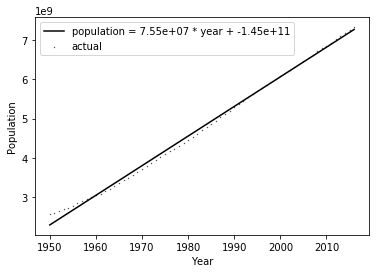

In [6]:
plt.scatter(years, populations, s=0.1, label='actual', color='k')
plt.plot(years.tolist(), (slope * years + intercept).tolist(), label=result, color='k')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.show();

In [7]:
x = years.reshape(-1, 1)
y = populations

x_mean, x_std = torch.mean(x), torch.std(x)
x_norm = (x - x_mean) / x_std
y_mean, y_std = torch.mean(y), torch.std(y)
y_norm = (y - y_mean) / y_std

fc = torch.nn.Linear(1, 1)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(fc.parameters())
weight_norm, bias_norm = fc.parameters()

for step in range(5001):
    if step:
        fc.zero_grad()
        loss_norm.backward()
        optimizer.step()
    output_norm = fc(x_norm)
    pred_norm = output_norm.squeeze()
    loss_norm = criterion(pred_norm, y_norm)
    weight = y_std / x_std * weight_norm
    bias = (weight_norm * (0 - x_mean) / x_std + bias_norm) * y_std + y_mean
    if step % 1000 == 0:
        print('第{}步：weight = {}, bias = {}'.format(step, weight.item(), bias.item()))

result = 'population = {:.2e} * year + {:.2e}'.format(weight.item(), bias.item())
print('回归结果：' + result)

第0步：weight = -2051082.75, bias = 9893657600.0
第1000步：weight = 54465700.0, bias = -103104684032.0
第2000步：weight = 73434320.0, bias = -140840599552.0
第3000步：weight = 75267792.0, bias = -144477749248.0
第4000步：weight = 75291000.0, bias = -144523771904.0
第5000步：weight = 75291104.0, bias = -144523968512.0
回归结果：population = 7.53e+07 * year + -1.45e+11
